In [16]:
import numpy as np
from __future__ import division
import networkx as nx
import matplotlib.pyplot as plt

import utilities as ut
import generate_alphas as ga
import extreme_data as extr
import clef_algo as clf
import hill_estimator as hill
import peng_estimator as peng
import kappa_estimator as kap
import hydro_map as hm
import damex_algo as dmx

In [2]:
X = np.load('data/hydro_data/raw_discharge.npy')
V = extr.rank_transformation(X)
n, d = V.shape

In [41]:
R = 1000
n_extr = np.sum(np.sum(V > R, axis=1) > 0)
print 'nb extreme points:', n_extr
V_bin = 1.*(V > R)
V_bin = V_bin[np.sum(V_bin, axis=1) > 0]
S = ut.similarity_levenshtein(V_bin)

nb extreme points: 496


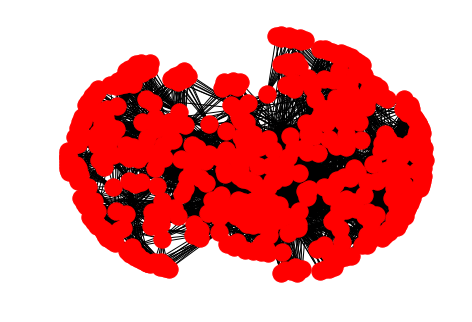

In [42]:
G = nx.from_numpy_matrix(S)
pos = nx.spring_layout(G, k=0.05)
nx.draw(G, pos=pos)

In [48]:
from sklearn.cluster import SpectralClustering
# Spectral clustering
K_spec = 20
spc = SpectralClustering(n_clusters=K_spec, affinity='precomputed')
spc.fit(S)
labels = spc.labels_

In [59]:
print [np.sum(labels == k) for k in range(K_spec)]
for v in V_bin[labels == 0]:
    print list(np.nonzero(v)[0])

[54, 13, 11, 123, 10, 11, 25, 11, 12, 14, 6, 62, 10, 8, 10, 21, 9, 19, 58, 9]
[74, 81]
[74]
[74, 84, 85]
[74, 84, 85, 86]
[2, 3]
[3]
[74, 84, 85]
[78]
[11, 81, 84, 85, 86]
[3]
[84, 85, 86]
[84, 86]
[85]
[67]
[78, 79]
[77, 78, 79]
[34, 38, 40, 42, 67, 68, 73, 75]
[28, 77, 78, 79]
[67, 77, 78, 79, 83, 87]
[28, 57, 67, 69, 77, 79]
[3, 67, 74, 75, 77, 78]
[84, 86]
[75, 77, 78, 79]
[3]
[79]
[17, 42, 68, 83, 85, 86]
[2, 3, 77, 78, 81, 84, 85, 86]
[3, 68, 75, 85, 86]
[79]
[77, 78, 79]
[79]
[77, 78, 79, 87, 89]
[77, 78, 79]
[74]
[68]
[74, 75]
[68, 75]
[74, 75, 84, 85, 86]
[67, 68, 74, 75, 84, 85, 86]
[5, 68, 74, 76, 84, 85, 86]
[74, 75, 86]
[68, 75]
[67]
[67]
[67]
[68, 77]
[74, 75, 81, 89]
[75, 77, 89]
[78]
[75, 77, 78]
[30, 77, 78, 79]
[5, 67, 68, 73]
[3]
[3, 67]


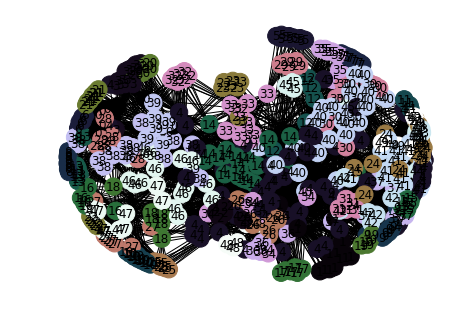

In [46]:
labels_dict = {i: str(labels[i])
               for i in range(n_extr)}
cmap = plt.get_cmap('cubehelix', K_spec)
nx.draw(G, pos=pos, node_color=labels/K_spec, cmap=cmap, labels=labels_dict)

In [ ]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
ind_train, ind_test = list(rs.split(V))[0]
V_train = V[ind_train]
n_train = V_train.shape[0]
V_test = V[ind_test]
n_test = V_test.shape[0]

In [ ]:
R = 100
print 'nb extreme points:', np.sum(np.sum(V_train > R, axis=1) > 0)
V_bin = 1.*(V_train > R)
V_bin = V_bin[np.sum(V_bin, axis=1) > 1]
kappa_min = 0.2
alphas_clf = clf.clef_0(V_bin, kappa_min)

In [ ]:
faces = ga.list_alphas_to_vect(alphas_clf, d)

In [ ]:
V_bin_test = 1.*(V_test > R)
V_bin_test = V_bin_test[np.sum(V_bin_test, axis=1) > 1]
dist = []
for v in V_test:
    v_bin = 1.*(v > R)
    dist.append(np.min(ut.levenshtein_dist_mat(v_bin, faces)))
print np.sum(dist)/n_test

In [ ]:
V_bin_test = 1.*(V_test > R)
V_bin_test = V_bin_test[np.sum(V_bin_test, axis=1) > 1]
v = V_bin_test[0]
print v
faces = ga.list_alphas_to_vect(alphas_clf, d)
print ut.levenshtein_dist_mat(v, faces)
print faces[4]